In [77]:
import shapely, geopandas
from geoshapes import splitShape
%matplotlib inline

In [78]:
pointLocation = shapely.geometry.Point(0.0,0.0)

In [79]:
#help(splitShape.splitCircle)

## splitCircle
1. splitCircle require a shapely Point (geoms) feature to create split geometry from that location.
2. splitCircle require a radius length (circleRadius) for creating circle feature from the given location.

In [80]:
circle = splitShape.splitCircle(
    geoms = pointLocation,
    circleRadius = 50,
    incrementDegree = 5,
    clipInterior = True,
    innerWidth = 30,
    getGeom = 'Both')

<AxesSubplot:>

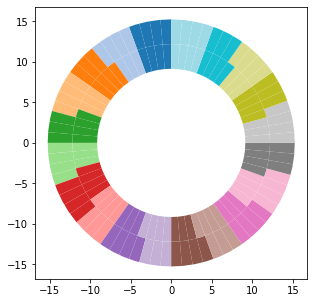

In [81]:
gdf = geopandas.GeoDataFrame(geometry = circle)

gdf.plot(figsize = (5, 5), cmap = 'tab20')


<AxesSubplot:>

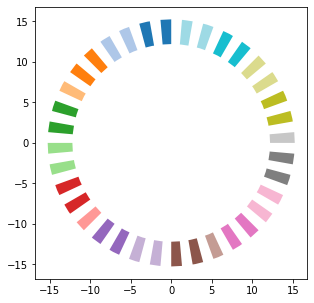

In [82]:
gdf = geopandas.GeoDataFrame(geometry = circle[::4])

gdf.plot(figsize = (5, 5), cmap = 'tab20')

<AxesSubplot:>

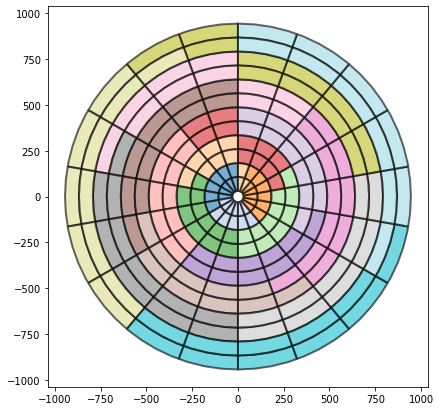

In [88]:
radius = 3000
innerClip = 100
stepWise = 500

mergedData = geopandas.GeoDataFrame()
for i in range (innerClip, radius, stepWise):
    circle = splitShape.splitCircle(
        geoms = pointLocation,
        circleRadius = i+stepWise,
        incrementDegree = 20,
        clipInterior = True,
        innerWidth = i,
        getGeom = 'Both')
    circleGeo = geopandas.GeoDataFrame(geometry = circle[::None])
    mergedData = mergedData.append(circleGeo)

mergedData.reset_index(drop = True, inplace = True)
mergedData.plot(figsize = (7,7), alpha = 0.6, cmap = 'tab20', edgecolor = 'k', linewidth = 2)

In [89]:
def getTreatment(radius, innerClip, stepWise, skip = 4):
    mergedData = geopandas.GeoDataFrame()
    for i in range (innerClip, radius, stepWise):
        circle = splitShape.splitCircle(
            geoms = pointLocation,
            circleRadius = i+stepWise,
            incrementDegree = 20,
            clipInterior = True,
            innerWidth = i,
            getGeom = 'Both')
        circleGeo = geopandas.GeoDataFrame(geometry = circle[::int(skip)])
        mergedData = mergedData.append(circleGeo)

    mergedData.reset_index(drop = True, inplace = True)
    mergedData['ids'] = range(len(mergedData))
    ax = mergedData.plot(figsize = (7,7), alpha = 0.6, cmap = 'tab20', edgecolor = 'k', linewidth = 2)
    mergedData.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return mergedData

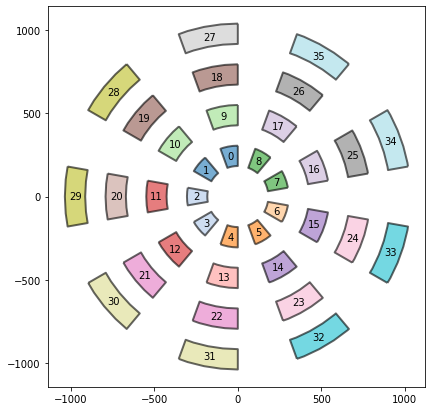

In [90]:
plots = getTreatment(3000, 200, 800, 4)

In [76]:
help(splitShape.splitLatin)

Help on method splitLatin in module geoshapes.geoshapes:

splitLatin(geoms: shapely.geometry.point.Point, bufferLength: int) method of builtins.type instance
    To split Polygon geometry into latin design to create a experimental plot.
    For reference : https://online.stat.psu.edu/stat503/lesson/4/4.3
    
    Parameters
    ----------
    geoms : shapely.geometry.Point
        DESCRIPTION. Single point shapely geometry
    bufferLength : int
        DESCRIPTION. Length of buffer or, side length
    
    Returns
    -------
    TYPE
        DESCRIPTION. List of shapely polygon geometry



In [91]:
latin = splitShape.splitLatin(
    geoms = pointLocation,
    bufferLength = 50)

latinGeo = geopandas.GeoDataFrame(geometry = latin)

<AxesSubplot:>

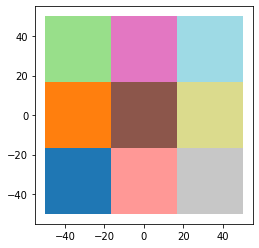

In [92]:
latinGeo.plot(cmap = 'tab20')